# Markov chains

```{epigraph}
> "Proceeding by guesswork."

-- Plato (attr.), on the meaning of stochastic
```
Many relevant stochastic processes share the following property: Conditional on their value at step $n$, the future values do not depend on the previous values. Such processes can be said to have a very short memory and are known as Markov chains. Let us for simplicity in notation focus on discrete processes where the time index takes integer values.

```{prf:definition} Markov chains
:label: definition:markov-chains

The stochastic process $X$ is a Markov chain if it has the **Markov property**

\begin{equation}
  \prob_{X_n \vert X_0, X_1,\ldots, X_{n-1}}\left( i_n \vert i_0, i_1,\ldots, i_{n-1} \right)
  = \prob_{X_n \vert X_{n-1}}\left( i_n \vert i_{n-1} \right)
\end{equation}

for a countable (discrete) sample space. For continuous variables we formulate this property using conditional distribution functions

\begin{equation}
  P_{X_n \vert X_0, X_1, \ldots, X_{n-1}} \left( x_n \vert  x_0, x_1, \ldots, x_{n-1} \right)
  = P_{X_n \vert X_{n-1}} \left( x_n \vert x_{n-1} \right)
\end{equation}

```  


An alternative, expressive formulation is

> Conditional on the present, the future of a Markov chain does not depend on the past.

An observer of a Markov process would only have to measure the one-step conditional probability distributions

\begin{equation}
\begin{gathered}
P_{X_0}(x_0), \\
P_{X_1 \vert X_0}(x_1 | x_0), \\
P_{X_2 \vert X_1}(x_2 | x_1), \\
\vdots\\
P_{X_n \vert X_{n-1}}(x_n | x_{n-1}),
\end{gathered}
\end{equation}

to understand the process. 

## Stationary processes

An important subset of Markov processes are **stationary** which implies that the conditional probability distribution does not depend on the position in time. In combination with the Markov property, this can be viewed as a process with very *short-term memory* and *no sense of time*. An observer of a stationary Markov process only needs to measure

\begin{equation}
\begin{gathered}
P_{X_0}(x_0), \\
P_{X_n \vert X_{n-1}}(x_n | x_{n-1}),
\end{gathered}
\end{equation}

for any $n$, to have a complete description. Here is a more formal definition.

```{prf:definition} Stationary processes
:label: definition:stationary-processes

Given a countable (discrete) sample space $S$, the Markov chain $X$ is stationary if

\begin{equation}
  \prob_{X_{n+1} \vert X_n} \left(  j \vert  i \right)
  = \prob_{X_1 \vert X_0} \left( j \vert  i \right)
  \equiv T(i,j)
\end{equation}

for all $n,i,j$. Here we have also introduced the (stationary) **transition density** $T$, which here becomes an $|S| \times |S|$ matrix with elements $T(i,j)$. 

For continuous variables we use (conditional) distribution functions and we introduce the continuous transition density 

\begin{equation}
  P_{ X_{n+1} \vert X_n} \left( x_j \vert x_i \right)
  = P_{X_1 \vert X_0} \left( x_j \vert x_i \right)
  \equiv T\left( x_i, x_j \right).
\end{equation}

```  

Be aware since the transition density is sometimes denoted $T(x_j \leftarrow x_i)$ or even $T_{j,i}$. 

```{exercise} Stochastic matrix
:label: exercise:MarkovChains:stochastic-matrix

The transition density $T$ is a so called *stochastic matrix*. What properties must it have? (consider the discrete case with matrix elements $T(i,j)$).
```

```{exercise} Simple random walk
:label: exercise:MarkovChains:simple-random-walk

- How can you see that the random walk introduced in {prf:ref}`example:simple-random-walk` is a Markov process?
- Is it stationary? 
- If so, what are the matrix elements of the transition density?
```

In the following we will only consider stationary Markov chains and we stress that these are fully defined by $P_{X_0}(x_0)$ and $T\left( x_i, x_j \right)$. 

````{prf:example} A simple Markov process
:label: example:simple-markov-process

Let us construct a simpe Markov process using again the abstract python class [`StochasticProcess`](https://gitlab.com/cforssen/tif385-book/-/blob/tif385/content/Utils/StochasticProcess/StochasticProcess.py)).

We initialize the chain with a uniform random variable $p_{X_0}(x_0) = \mathcal{U}\left( [0,1] \right)$ and update it using the conditional probability density function

\begin{equation}
p_{ X_{n+1} \vert X_n} \left( x_j \vert x_i \right) = \mathcal{U}\left( \left[ \frac{x_i}{2} ,\frac{x_i+1}{2} \right] \right).
\end{equation}

The simulations in {numref}`fig-example-MarkovProcessExample_runs_fig` and {numref}`fig-example-MarkovProcessExample_corner_fig` includes two relevant visualizations:
* Plots of the first variables from a few runs.
* A corner plot of bivariate and univariate marginal distributions.

````

```{glue:figure} MarkovProcessExample_runs_fig
:name: fig-example-MarkovProcessExample_runs_fig

First 50 variables in four realisations of the chain.
```

```{glue:figure} MarkovProcessExample_corner_fig
:name: fig-example-MarkovProcessExample_corner_fig

Joint bivariate and univariate probability distributions. The statistics to produce these plots were gathered from 20,000 realisations of the Markov chains.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

import sys
import os
# Adding ../../Utils/ to the python module search path
#sys.path.insert(0, os.path.abspath('../../Utils/'))
sys.path.insert(0, os.path.abspath('./CodeLocal/'))

from StochasticProcess.StochasticProcess import StochasticProcess as SP

class MarkovProcessExample(SP):
    def start(self,random_state):
        return random_state.uniform()

    def update(self, random_state, history):
        return 0.5 * ( history[-1] + random_state.uniform() )
        

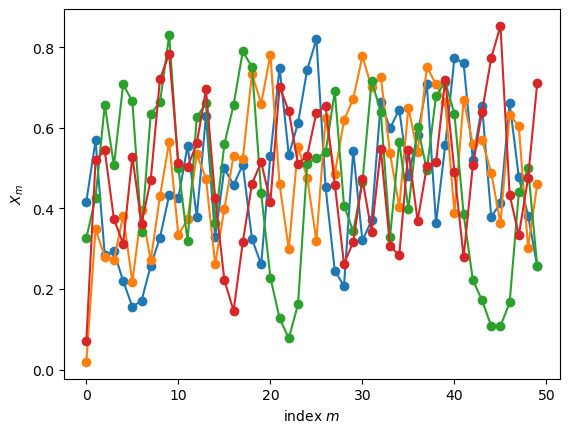

In [2]:
# Create an instance of the class. It is possible to provide a seed
# for the random state such that results are reproducible.
example = MarkovProcessExample(seed=1)

# The following method calls produce 4 runs, each of length 50, and plots them.
example.create_multiple_processes(50,4)
fig_runs, ax_runs = example.plot_processes()
glue("MarkovProcessExample_runs_fig", fig_runs, display=False)

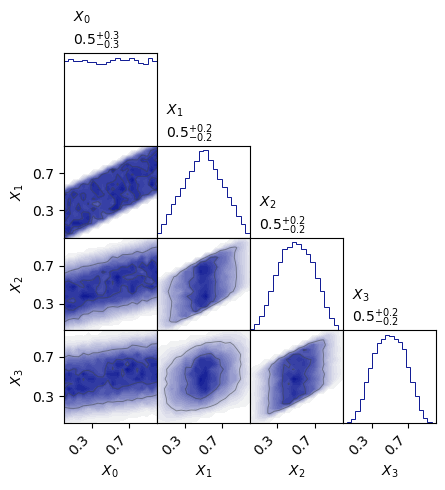

In [3]:
# Marginal, joint distrubtions 
import prettyplease.prettyplease as pp

# Here we instead create 20,000 runs (to collect statistics), each of length 13.
example.create_multiple_processes(13,40000)
# but we just plot the first four variables
fig_corner = pp.corner(example.sequence[:4,:].T,labels=[fr'$X_{{{i}}}$' for i in range(4)])
glue("MarkovProcessExample_corner_fig", fig_corner, display=False)

## Stationary and limiting distributions


We will now explore the long-time evolution of a Markov chain. We will, for simplicity, consider a countable sample space although our final application will be to continuous probability distributions. 

First, we note that even the Markov process with its very short memory (dependence on just the previous value) will maintain an imprint of earlier positions. This imprint, however, will be finite. Let us explore the first few steps pf the chain. The conditional probability of being in state $k$ at position 2 given that we started in position $i$ at $t=0$ can be obtained using the product rule {eq}`eq:Statistics:product-rule`

$$
\cprob{X_{2}=k}{X_{0}=i} &= \sum_j  \cprob{X_{2}=k, X_{1}=j}{X_{0}=i} \\
&= \sum_j  \cprob{X_{2}=k}{X_{0}=i, X_{1}=j} \cprob{X_{1}=j}{X_{0}=i} \\
&= \sum_j  \cprob{X_{2}=k}{X_{1}=j} \cprob{X_{1}=j}{X_{0}=i} ,
$$ (eq:MarkovChains:PX2|X0)

where we have employed the Markov property in the last equality. We can now compare this with the probability of being in state $k$ at position 2 without any condition on the starting position

$$
\prob \left( X_{2}=k \right) &= \sum_{i,j}  \prob \left( X_{2}=k, X_{1}=j, X_{0}=i \right) \\
&= \sum_{i,j}  \cprob{X_{2}=k}{X_{0}=i, X_{1}=j} \prob \left( X_{1}=j, X_{0}=i \right) \\
&= \sum_{j}  \cprob{X_{2}=k}{X_{1}=j} \prob \left( X_{1}=j \right),
$$ (eq:MarkovChains:PX2)

where we have again used the product rule and the Markov property. In the final equality we also used the marginalization of the joint probability. The comparison of Eqs. {eq}`eq:MarkovChains:PX2|X0` and {eq}`eq:MarkovChains:PX2` reveals that the two probabilites are not equal in general. They would be equal if $\cprob{X_{1}=j}{X_{0}=i} = \prob \left( X_{1}=j \right)$, which is only fulfilled if the positions are in fact completely independent.

```{exercise} Remnant memory
:label: exercise:MarkovChains:memory

Can you visually verify the remnant memory by identifying the distributions {eq}`eq:MarkovChains:PX2|X0` and {eq}`eq:MarkovChains:PX2` in {numref}`fig-example-MarkovProcessExample_corner_fig` of  {prf:ref}`example:simple-markov-process`?

Hint: The conditional distribution is actually not shown in {numref}`fig-example-MarkovProcessExample_corner_fig` but is easy to obtain using the simple initial distribution and Eq. {eq}`eq:Statistics:conditional-probability`.
```

The remnant memory in the process from {prf:ref}`example:simple-markov-process` 
is considered in {numref}`exercise:MarkovChains:memory`. Conditional distributions $\pdf{x_m}{x_n}$ (for $m>n$) can be produced with the method `plot_conditional_distributions()` in the [`StochasticProcess`](https://gitlab.com/cforssen/tif385-book/-/blob/tif385/content/Utils/StochasticProcess/StochasticProcess.py) class.

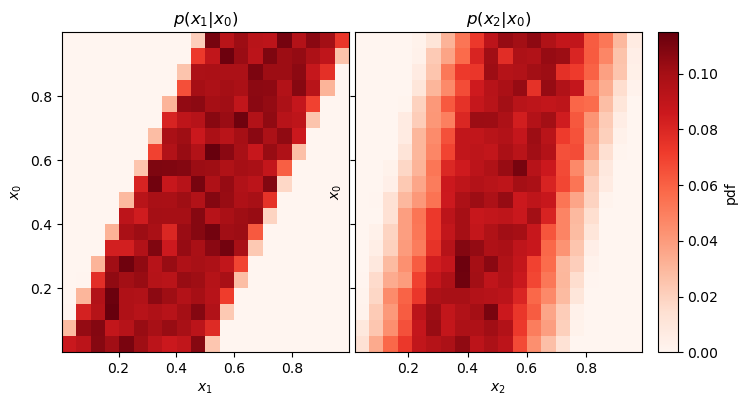

In [4]:
fig_X2givenX0,_,_,_,_ = example.plot_conditional_distributions([1,2],bins=20)
glue("X2givenX0_fig", fig_X2givenX0, display=False)

```{glue:figure} X2givenX0_fig
:name: "fig:X2givenX0"

The conditional distributions $\pdf{x_1}{x_0}$ and $\pdf{x_2}{x_0}$ for {prf:ref}`example:simple-markov-process`. Note that each of these is a one-dimensional distribution whose shape might depend on the value of $x_0$. This property is visualized here by histogramming the distributions. Each row corresponds to a bin of $x_0$ values and 
represents the corresponding $\pdf{x_m}{x_0}$ distribution. It is clear from this figure that these distributions are indeed dependent on the value of $x_0$.
```

```{exercise} Conditional distributions
:label: exercise:MarkovChains:conditional-distributions

Consider {numref}`fig:X2givenX0`.
- The speckling is due to using finite statistics to estimate the probability. How would this plot look different with infinite statistics?
- This left panel shows $\pdf{x_1}{x_0}$. Would $\pdf{x_2}{x_1}$ look any different? 
- Are these conditional probabilities normalized along $x_0$? along $x_{1,2}$ ?
- How would this plot change if we changed the definition of `start()` in `MarkovProcessExample`?
```

We have shown that there is in fact some memory in a stationary Markov chain. However, it can be shown that a stationary Markov chain (with certain additional properties) will eventually reach an equilibrium where the distribution of $X_n$ actually does settle down to a **limiting distribution**.

```{prf:definition} Limiting distribution
:label: definition:limiting-distribution

The vector $\pi$ is called a limiting distribution of the Markov chain if it has entries $(\pi_j \; : \; j \in S)$ such that

1. $\pi_j \geq 0$ for all $j$
2. $\sum_j \pi_j = 1$
3. $\pi_j = \lim_{n \to \infty} T^n(i,j)$ for all $i,j$,

where $T$ is the transition density of the Markov chain. 
```

This definition is equivalent to the matrix equality

$$
\pi = \lim_{n \to \infty} \alpha T^n,
$$ (eq:MarkovChains:limiting-distribution)

where $\alpha$ is any intial distribution.

By the uniqueness of limits, the existence of a limiting distribution will imply that it is unique.

Assuming that $\pi$ is a limiting distribution of a chain, then it is also a **stationary distribution** (also known as **equilibrium distribution**). 

```{prf:definition} Stationary distribution
:label: definition:stationary-distribution

The vector $\pi$ is called a stationary distribution of the Markov chain if it has entries $(\pi_j \; : \; j \in S)$ such that

1. $\pi_j \geq 0$ for all $j$
2. $\sum_j \pi_j = 1$
3. $\pi_j = \sum_i \pi_i T(i,j)$ for all $j$,

where $T$ is the transition density of the Markov chain. 
```  

The last equality can be written on matrix form as 

$$
\pi = \pi T
$$ (eq:MarkovChains:discrete-equlibrium)

and can be seen as an eigenvalue equation (with eigenvalue 1) where $\pi$ is a *left* eigenvector.

A limiting distribution $\pi$ is also a stationary one. According to Eq. {eq}`eq:MarkovChains:discrete-equlibrium` we just need to show that $\pi T = \pi$. 
See {numref}`exercise:limiting-distribution` to complete the proof.

This implies that the random variable $X_n$ will be distributed according to $\pi$ for large enough $n$ and that it will be stationary as time passes. 

The extra, required properties for such a **limiting distribution** to occur are 

irreducibility
: all states *communicate* with each other which basically implies that all parts of the state space can be reached regardless of starting position;

and that all states are 

positively recurrent
: the probability of eventually returning to position $i$, having started from $i$, is 1 for all $i$. 

In addition, with the additional property of

aperiodicity
: the recurrence of any position $i$ does not follow a simple periodic pattern;

it can be shown that the stationary Markov chain will reach its unique limiting distribution regardless of starting point. This is the so called **limit theorem**. Henceforth we will only deal with irreducible, positively recurrent, aperiodic chains unless otherwise indicated.

````{prf:example} Stationary distribution of "A simple Markov process"
:label: example:stationary-simple-markov-process

Let us consider again the Markov process from {prf:ref}`example:simple-markov-process`. We could see in {numref}`fig:X2givenX0` that there was some remnant memory of $x_0$ after two steps. However, according to the discussion above, this memory should eventually disappear and we will be left with the stationary (or *equilibrium*) distribution.  This is clearly seen in {numref}`fig-example-XmgivenX0`.

````

```{glue:figure} XmgivenX0_fig
:name: "fig-example-XmgivenX0"

The appearance of a limiting distribution already after $\approx$ 8--12 iterations.
```

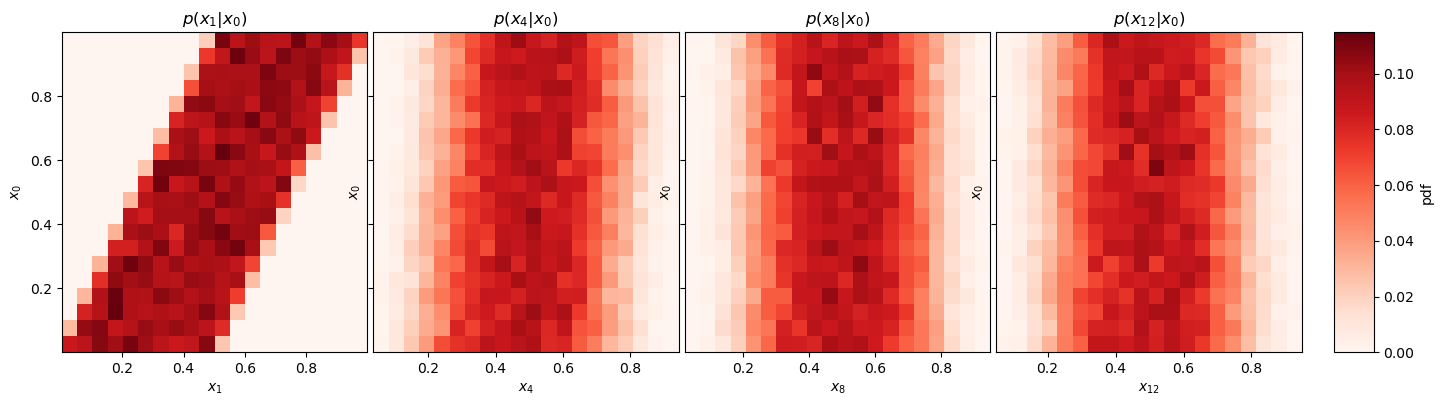

In [5]:
fig_XmgivenX0,_,_,_,_ = example.plot_conditional_distributions([1,4,8,12],bins=20)
glue("XmgivenX0_fig", fig_XmgivenX0, display=False)

For practical purposes there are two issues to deal with:

- There is no way to know in advance how big $n$ needs to be to reach equilibrium.
- Given a stationary Markov chain, we can generate samples from its equilibrium distribution; but how do we construct a chain to sample a specific distribution?

The latter problem is actually an example of an **inverse problem**. These are in general very difficult to solve. However, in this case there is a very clever, general class of solutions that we will look at in the next chapter.

```{exercise} Stationary distribution
:label: exercise:MarkovChains:stationary-distribution

Show that {prf:ref}`definition:stationary-distribution` implies that there is a stationary distribution $\pi$ such that $\prob \left( X_{n}=i \right) = \prob \left( X_{n-1}=i \right) = \pi_i$
```

## Reversibility

Another important property that some Markov chains can have is reversability. This property can also be seen as an invariance under reversal of time. Let us consider $X$, an irreducible, positive recurrent Markov chain of length $N$, $\{ X_N \, : \, 0 \leq n \leq N \}$, with transition matrix $T_X$ and stationary distribution $\boldsymbol{\pi}$. Suppose further that $X_0$ has the distribution $\boldsymbol{\pi}$ such that all $X_n$ also have the same distribution.

Define the reversed chain $Y$ with elements $Y_n = X_{N-n}$. One can show that this sequence will also be a Markov chain, and that its transition matrix $T_Y$ will be given by

$$
T_Y(i,j) = \prob_{Y_{n+1 \vert Y_n}}(j \vert i) = \frac{\pi_j}{\pi_i} T_X(j,i).
$$ (eq:MarkovChains:T_Y_vs_T_X)

The chain $Y$ is called the *time-reversal* of $X$, and we say that $X$ is *reversible* if $T_X = T_Y$.

Considering a reversible chain with transition density $T$ and stationary distribution $\boldsymbol{\pi}$, the property of reversibility can be formulated as a **detailed balance**

$$
\pi_i T(i,j) = \pi_j T(j,i),
$$ (eq:MarkovChains:detailed-balance)

for all $j,i$ in $S$. 

```{exercise} Reversibility
:label: exercise:MarkovChains:reversibility

- Are all stationary chains reversible?
- Are all reversible chains stationary?
```

````{prf:example} A reversible Markov process
:label: example:reversible-markov-process

We can construct a transition denisty that fulfills detailed balance by applying an update rule that is composed of a step proposal and an acceptance decision:

```{code-block} python
def update(self, random_state, history):
	propose = history[-1] + 0.5*(random_state.uniform()-0.5)
    if propose<0 or propose>1:
        return history[-1]
    else:
        return propose
```

This family of transition densities will be discussed in more detail in the next chapter. For now, we just simulate the above chain and study a set of chains in {numref}`fig-example-ReversibleMarkovProcessExample-runs` and a subset of conditional probabilities in {numref}`fig-example-ReversibleMarkovProcessExample-cprob` (produced with the script below). Some relevant questions are listed in {numref}`exercise:MarkovChains:reversible-chain`.

````

```{glue:figure} ReversibleMarkovProcessExample_runs_fig
:name: "fig-example-ReversibleMarkovProcessExample-runs"

Four chains produced with the reversible Markov chain.
```

```{glue:figure} ReversibleMarkovProcessExample_cprob_fig
:name: "fig-example-ReversibleMarkovProcessExample-cprob"

Conditional probabilities for the reversible Markov chain. See the caption of {numref}`fig:X2givenX0` for explanations how to interpret these plots.
```

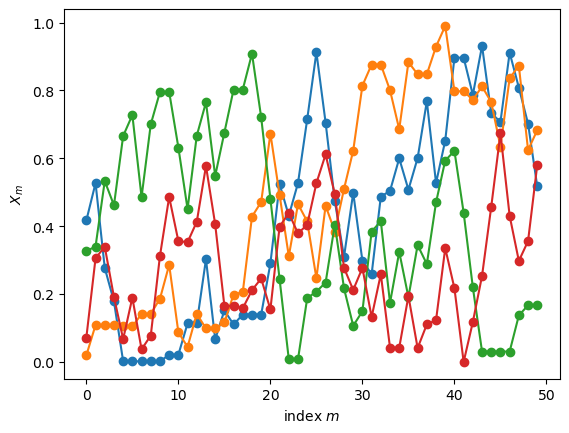

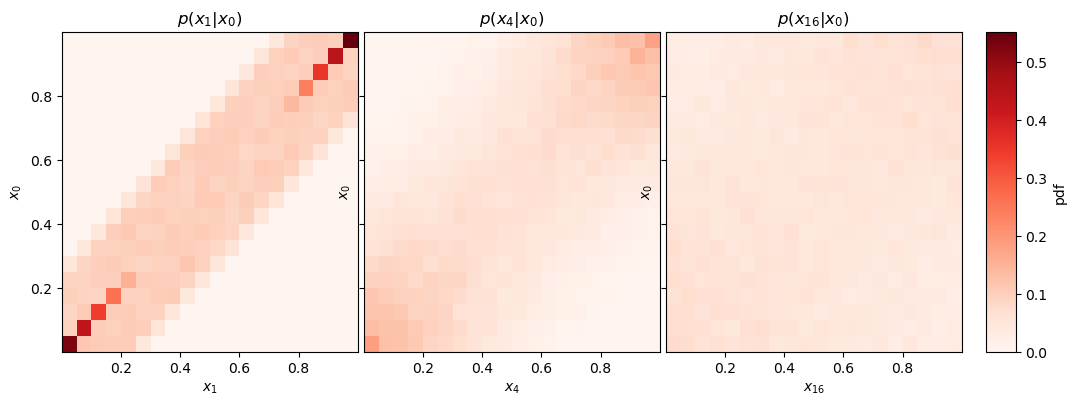

In [6]:
class ReversibleMarkovProcessExample(SP):
    def start(self,random_state):
        return random_state.uniform()

    def update(self, random_state, history):
        propose = history[-1] + 0.5*(random_state.uniform()-0.5)
        if propose<0 or propose>1:
            return history[-1]
        else:
            return propose
            
example_reversible = ReversibleMarkovProcessExample(seed=1)

example_reversible.create_multiple_processes(50,4)
fig_runs_reversible, ax = example_reversible.plot_processes()
glue("ReversibleMarkovProcessExample_runs_fig", fig_runs_reversible, display=False)

example_reversible.create_multiple_processes(17,40000)
fig_cprob_reversible,_,_,_,_ = example_reversible.plot_conditional_distributions([1,4,16],bins=20)
glue("ReversibleMarkovProcessExample_cprob_fig", fig_cprob_reversible, display=False)

```{exercise} A reversible Markov chain
:label: exercise:MarkovChains:reversible-chain

Consider {numref}`fig-example-ReversibleMarkovProcessExample-cprob`. 
- Where is the transition density reflected in this plot?
- Is this a reversible Markov chain?
- Can you guess what is the equilibrium distribution?
```


## Metropolis design

A Markov chain that reaches an equilibrium with a stationary distribution $\pi$ will have all subsequent outcomes distributed according to $\pi$. Here we consider discrete chains with a discrete sample space.

`````{admonition} Sampling a distribution
:class: tip
Consider a sequence of outcomes $(i_0, i_1, i_2, \ldots)$ from a stationary Markov chain. 
1. The first outcome, $i_0$, is in practice a sample from the initial probability distribution $\pi^{(0)}$. Note that $\pi^{(0)}_i = \prob_{X_0}(i)$.
2. The second outcome, $i_1$, is a sample from $\pi^{(1)} = \pi^{(0)} T$. In practice, since we have the first outcome $i_0$, we obtain this second outcome as a sample from the conditional distribution for $X_1$ given $X_0$, i.e., a distribution with elements $\prob_{X_1 \vert X_0}(i \vert i_0) = T(i_0, i)$.
3. Continuing the process of drawing samples from conditional distributions we find that the $n$:th outcome $i_n$ is a sample from $\pi^{(n)} \pi^{(0)} T^n$, but in practice we obtain it as a draw from $\prob_{X_n \vert X_{n-1}}(i \vert i_{n-1}) = T(i_{n-1}, i)$.

Dismissing the first $n$ outcomes, for which we have not yet reached equilibrium, we have the sequence $(i_{n+1}, i_{n+2}, \ldots)$. These are, respectively, samples from $\pi^{(n+1)}, \pi^{(n+2)}, \ldots$. Assuming that the Markov chain has reached equilibrium, then all of these distributions are in fact the same. Therefore, our sequence of outcomes after equilibration are samples from the *same* distribution $\pi$.
`````

Now we would like to *design* a stationary Markov chain, via its transition matrix $T$, such that it has a desired probability distribution $\pi$ as its limiting distribution. Let us first recapitulate some important facts concerning Markov chains. 

1. A stationary Markov chain is guaranteed to have a limiting distribution when the transition matrix $T$ fulfills certain conditions (irreducibility, etc).
2. A limiting distribution $\pi$ is also a stationary distribution: $\pi = \pi T$.
3. A distribution $\pi$ that fulfills detailed balance, $\pi_i T(i,j) = \pi_j T(j,i)$, is guaranteed to be a stationary distribution.

We utilize these facts in the so called Metropolis design of a Markov chain.

````{prf:remark} The Metropolis design for obtaining a discrete limiting distribution
:label: remark:MCMC:Metropolis-discrete

We want to design a stationary Markov chain that has a desired distribution $\pi$ as its limiting distribution. To achieve this, we construct the transition matrix in a product form. Its non-diagonal elements are

\begin{equation}
T(i,j) = A(i,j) S(i,j), \quad \text{for } i \neq j,
\end{equation}

where $S$ is a (discrete) step proposal matrix and $A$ contains acceptance probabilities. Formally, the elements of these matrices should be interpreted as probabilities

\begin{align}
S(i,j) &= \cprob{\text{proposing next position } j}{\text{current position is } i}, \\
A(i,j) &= \cprob{\text{accepting new position } j}{\text{current position is } i},
\end{align}

where we think of outcomes of subsequent random variables as positions in the sample space. Note how the probability of a transition from $i$ to $j$, given by $T(i,j)$, is then the product of these two independent (proposal and acceptance) probabilities.

Constraining $T$ to fulfill detailed balance {eq}`eq:MarkovChains:detailed-balance` we can guarantee that $\pi$ is a stationary distribution. That is, we require

\begin{equation}
\pi_i S(i,j) A(i,j) = \pi_j S(j,i) A(j,i).
\end{equation}

This condition is fulfilled for any stochastic matrix $S$ (impying non-negative entries and row sums equal to one) if one sets the acceptance probability

\begin{equation}
A(i,j) = \min\left(1, \frac{\pi_j}{\pi_i}\frac{S(j,i)}{S(i,j)} \right),
\end{equation}

where the second argument to the min-function is known as the *Metropolis ratio*.

Finally, the diagonal entries of the transition matrix are

\begin{equation}
T(i,i) = S(i,i) + \sum_{j \neq i} S(i,j) \left( 1 - A(i,j)\right),
\end{equation}

which can be understood by the fact that transitions to the same position can be triggered by a proposed move (the first term; note that $A(i,i)=1$), or by a non-accepted, proposed move to any other position (the sum in the second term). 

Different choices of $S$ can be considered. As long as the chain is irreducible, positively recurrent, and aperiodic then it is guaranteed that $\pi$ is a limiting distribution.

See {numref}`exercise:MCMC:discrete-metropolis` for an explicit example.
````


## Exercises

```{exercise} Stationary two-state distribution 
:label: exercise:stationary-2x2

Find the stationary distribution to the Markov chain with transition matrix

$$
T = \left[                                                                  
     \begin{array}{cc}                                                           
         1-p & p  \\                                                               
         q & 1-q \\
     \end{array}                                                                 
\right].                                                                
$$

```

```{exercise} Limiting distribution
:label: exercise:limiting-distribution

(*i*) Assume that $\pi$ is a limiting distribution of a Markov chain. Show that
$\pi$ is also stationary distribution.

(*ii*) Show by providing a counterexample that the converse of the above is 
not true.

```

```{exercise} Flip-flop
:label: exercise:flip-flop

Construct a transition matrix for a two-state system that will always flip state 1 $\leftrightarrow$ state 2.
- Does it have one or several stationary distributions?
- Is there a limiting distribution?

```


```{exercise} Gothenburg winter weather
:label: exercise:MarkovChains:gothenburg-winter-weather

The winter weather in Gothenburg consists mostly of rain plus the occasional days of snow and clear skies. We might describe this winter weather as a Markov chain in which the conditional probabilities for tomorrow's weather just depends on the weather today. Here is a realistic transition matrix for a Gothenburg winter weather chain

$$
\begin{array}{ccc}
& & 
\begin{array}{ccc} s\;\; & r & \;\; c \end{array} \\
T = &
\begin{array}{c} s \\ r \\ c \end{array} &
\begin{pmatrix}
0.2 & 0.6 & 0.2 \\
0.1 & 0.8 & 0.1 \\
0.1 & 0.6 & 0.3
\end{pmatrix}
\end{array}
$$

- What is the probability that it snows tomorrow given that it snows today?
- What is the minimum probability that it will rain tomorrow no matter what the weather today?
- Assume that the amount of precipitation is 2 mm if it snows, 5 mm if it rains, and 0 mm if the sky is clear. Given that the sky is clear today, what is the expected amount of precipitation tomorrow?
- The meterologist predicts 50% probability that it will snow tomorrow and 50% probability that it will rain. Find the probability that it will rain two days later (that is in three days from today).
```

```{exercise} Stationary Gothenburg winter weather
:label: exercise:stationary-gothenburg-winter-weather

Find the stationary distribution of the Gothenburg winter weather Markov chain from {numref}`exercise:MarkovChains:gothenburg-winter-weather`.

Test numerically that it is also a limiting distribution.

```

```{exercise} Is it reversible?
:label: exercise:is-it-reversible

Determine if the Markov chain with transition matrix

$$
T = \left[                                                                  
     \begin{array}{ccc}                                                           
         0 & 2/5 & 3/5  \\                                                               
         1/2 & 1/4 & 1/4 \\
         1/2 & 1/6 & 1/3
     \end{array}                                                                 
\right]                                                                
$$

is reversible.
```

```{exercise} Optical pumping
:label: exercise:optical-pumping

In this exercise we will consider a simple quantum mechanical system that
can be modeled using a Markov process.

Consider a quantum system that has three relevant energy levels labeled
1,2 and 3, see figure. We do not need to consider any quantum mechanics to solve 
this problem, but a few key properties are needed: An electron generally ''wants'' to be 
in the lowest possible energy state, and if it is excited to state 2 or 3 it
will eventually decay to a state will lower energy within some time frame. The 
possible decays and their respective probabilities are also shown in the figure.
However, by introducing an auxiliary driving mechanism, for example a laser, the 
electrons can transition from a lower energy level to a higher one. This is known as *optical pumping* and is depicted in the figure where electrons can go from state 1 to 3.

![file](./figs/levels.png)

The probabilities are given by

$$ 
p_{31} = 1/3,\quad p_{13} = 1/3, \quad p_{21} = 2/3, \quad p_{32} = 1/3.
$$

The time evolution of this system can be modeled as a Markov process with state $\pi_n = (a_n^1,a_n^2,a_n^3)$ (at time $t_n$)
which describes the distribution of the electrons among the three levels subject
to the constraint $\sum_i a_n^i = 1$. An example is
$\pi_n = (3/6,2/6,1/6)$ which describes that half of the particles are in the ground state, 
one third in the first excited state, and one sixth in the second excited state.

In our model the state will be updated at each time step ($\Delta t$) according to $\pi_{n+1} = \pi_n T$, where $T$ is a matrix of transition probabilities 
where $T_{ij}$ gives the probability that an electron in state $i$ goes to 
state $j$. 

We want to study the equilibrium distribution 
of electrons in this system, meaning that the state has evolved for a long time.

(*i*) Construct the transition matrix, $T$ from the 
transition probabilities that are given in the figure.

(*ii*) Find the limiting distribution (if it exists).

(*iii*) Would a limiting distribution fulfill detailed balance?
Why, why not?

(*iv*) (optional) Implement this process in the Python class `StochasticProcess` and simulate it for a few different starting configurations. Do you find the same limiting distribution as in the analytical calculation?

```

```{exercise} Detailed balance
:label: exercise:detailed-balance

Prove Eq. {eq}`eq:MarkovChains:T_Y_vs_T_X` to show that a reversible Markov chain must fulfill detailed balance {eq}`eq:MarkovChains:detailed-balance`.
```


## Solutions

```{solution} exercise:MarkovChains:stochastic-matrix
:label: solution:MarkovChains:stochastic-matrix
:class: dropdown

The transition density matrix $T$ has:
1. Non-negative entries; $T(i,j) \geq 0$ for all $i,j$.
2. Row sums equal to one; $\sum_j T(i,j) = 1$ for all $i$.
```

```{solution} exercise:MarkovChains:simple-random-walk
:label: solution:MarkovChains:simple-random-walk
:class: dropdown

- The update rule only depends on the last variable that was sampled.
- Yes, it is stationary since the update rule does not depend on the position in the chain but only on the value of the last variable that was sampled.
- $T(i,j) = \left\{ 
\begin{array}{ll}
0.5 & j=i \pm 1, \\
0 & \text{otherwise}.
\end{array}
\right.$
```

```{solution} exercise:MarkovChains:memory
:label: solution:MarkovChains:memory
:class: dropdown

The marginal distribution $\p{x_2}$ is shown in the third panel on the diagonal of {numref}`fig-example-MarkovProcessExample_corner_fig`. The fact that the initial distribution for $X_0$ is uniform implies that $\pdf{x_2}{x_0} \propto \p{x_2,x_0}$. The joint distribution on the right-hand side is shown in the third panel from the top in the fist column. The conditional distribution then corresponds to slices at different values of $x_0$. It is obvious that these slices do not look like $\p{x_2}$ for all values of $x_0$. (See also {numref}`fig:X2givenX0`.)
```

````{solution} exercise:MarkovChains:conditional-distributions
:label: solution:MarkovChains:conditional-distributions
:class: dropdown

- With infinite statistics, the diagonal band would be a uniform color since  $\pdf{x_1}{x_0}$ is uniform (within the diagonal limits shown) for each $x_0$.
- A plot of $\pdf{x_2}{x_1}$, or any $\pdf{x_{n+1}}{x_n}$ would look identical since this is the definition of a stationary Markov chain. 
- A conditional probability $\pdf{\alpha}{\beta}$ is normalized along $\alpha$, with the value of $\beta$ considered fixed. In other words, a `numpy` array of values `P[n,m]` tabulating $\pdf{x_m}{x_n}$ on a grid satisfies:
```{code-block} python
np.sum(P, axis=1) = 1
```
- This plot only shows the update rule and does not depend on how we chose an initial value for the Markov chain.

````

```{solution} exercise:MarkovChains:stationary-distribution
:label: solution:MarkovChains:stationary-distribution
:class: dropdown

Assume that $\prob \left( X_{n-1}=i \right) = \pi_i$. Then 

$$
\begin{aligned}
\prob \left( X_{n}=i \right) &= \sum_j \prob \left( X_{n}=i, X_{n-1}=j  \right) \\
&= \sum_j \cprob{X_{n}=i}{X_{n-1}=j} \prob \left( X_{n-1}=j \right) \\
&= \sum_j \pi_j T(i,j) = \pi_i.
\end{aligned}
$$
```

```{solution} exercise:MarkovChains:reversibility
:label: solution:MarkovChains:reversibility
:class: dropdown

- A reversible chain is always stationary, but not vice versa.
```

```{solution} exercise:MarkovChains:reversible-chain
:label: solution:MarkovChains:reversible-chain
:class: dropdown

- The first panel, $\pdf{x_1}{x_0}$, shows the transition density.
- A reversible Markov chain has $\pdf{x_{n+1}}{x_n} = \pdf{x_n}{x_{n+1}}$. Here we can study the first panel which indeed is symmetric under the interchange of its axes. In other words, mirroring the plot along the diagonal should not change its appearance.
- The equilibrium seem to provide samples from a uniform distribution $\mathcal{U}([0,1])$.
```


```{solution} exercise:stationary-2x2
:label: solution:stationary-2x2
:class: dropdown
Solve the system of equations

$$
\sum_i \pi_i T_{ij} = \pi_i, \quad \forall j
$$
subject to the constraint $\pi_1 + \pi_2 = 1$. The solution is

$$
\pi = \left(\frac{q}{p+q},\frac{p}{p+q}\right).
$$

```

```{solution} exercise:limiting-distribution
:label: solution:limiting-distribution
:class: dropdown


(*i*) By the assumption we have for any starting distribution $\alpha$ that

$$
\pi = \lim_{n\to \infty} \alpha T^n.
$$

This can be rewritten as

$$
\lim_{n\to \infty} \alpha T^n = \left( \lim_{n \to \infty} \alpha T^{n-1} \right) T = \pi T.
$$

(*ii*) The converse is not true. This can be shown by for example considering the 
transition matrix 

$$
T = \left[                                                                  
     \begin{array}{cc}                                                           
         1 & 0  \\                                                               
         0 & 1 \\
     \end{array}                                                                 
\right] .
$$

that has infinitely many stationary distributions (any distribution $(p,1-p)$ is stationary). However, this distribution will not be the limit for $n \to \infty$ transitions from any initial distribution $(q,1-q)$.
```

```{solution} exercise:flip-flop
:label: solution:flip-flop
:class: dropdown

$$
T = \left[                                                                  
     \begin{array}{cc}                                                           
         0 & 1  \\                                                               
         1 & 0 \\
     \end{array}                                                                 
\right] .
$$

The distribution $\pi = (0.5,0.5)$ is stationary. However, it is not a limiting distribution since it will not be reached from a random initial state.
```

```{solution} exercise:MarkovChains:gothenburg-winter-weather
:label: solution:MarkovChains:gothenburg-winter-weather
:class: dropdown

- $\cprob{s}{s} = T(s,s) = 0.2$
- $\min\left( \cprob{r}{i} \right) = 0.6$ for $i \in (s,r,c)$.
- The probability distribution for the weather tomorrow (given that it is clear today) is $(0.1, 0.6, 0.3)$ with the ordered states $(s,r,c)$. The expected amount of precipitation is therefore $\expect{\text{amount precipitation}} = 0.1 \cdot 2 + 0.6 \cdot 5 + 0.3 \cdot 0 = 3.2$ mm.
- The initial distribution is $\pi_1 = (0.5, 0.5, 0)$. We therefore have that the distribution two days later is 

  $$
  \pi_3 = \pi_1 T^2  = 
  (0.5, 0.5, 0)
  \begin{pmatrix}
  0.12 & 0.72 & 0.16 \\
  0.11 & 0.76 & 0.13 \\
  0.11 & 0.72 & 0.17
  \end{pmatrix}
   = (0.115, 0.74, 0.145).
  $$
  
  We find that the requested probability is 0.74.
```


```{solution} exercise:stationary-gothenburg-winter-weather
:label: solution:stationary-gothenburg-winter-weather
:class: dropdown

Solve the system of equations

$$
\sum_i \pi_i T_{ij} = \pi_i, \quad \forall j
$$

subject to the constraint $\pi_1 + \pi_2 +\pi_3= 1$. The solution is

$$
\pi = \left(\frac{1}{9},\frac{3}{4},\frac{5}{36}\right).
$$

A numerical test can be performed by evaluating a large number of transitions from different initial states.
```

```{solution} exercise:is-it-reversible
:label: solution:is-it-reversible
:class: dropdown

Solve the system of equations

$$
\sum_i \pi_i T_{ij} = \pi_i, \quad \forall j
$$

subject to the constraint $\pi_1 + \pi_2 + \pi_3= 1$ to find the stationary distribution.
The solution is

$$
\pi = \left(\frac{1}{3},\frac{4}{15},\frac{2}{5}\right).
$$

Check the detailed balance equations

$$
\pi_i T_{ij} = \pi_j T_{ji}, \quad \forall i,j
$$

All these hold, hence the chain is reversible.

```


```{solution} exercise:optical-pumping
:label: solution:optical-pumping
:class: dropdown

(*i*)
- The $T$ matrix can be constructed from the probabilities given, remembering that
the rows of $T$ must sum to one, which ensures that the probability
of the electron going anywhere (including staying where is it) is one.

$$
T = \left[                                                                  
     \begin{array}{ccc}                                                           
         1-p_{13} & 0 & p_{13} \\                                                               
         p_{21} & 1-p_{21}& 0 \\
         p_{31} & p_{32} & 1-p_{31}-p_{32}                                                                   
     \end{array}                                                                 
\right] =   \left[                                                                  
     \begin{array}{ccc}                                                           
         2/3 & 0 & 1/3 \\                                                               
         2/3 & 1/3 & 0 \\
         1/3 & 1/3 & 1/3                                                                   
     \end{array}                                                                 
\right] 
$$

(*ii*)
- If there is a limiting stationary distribution, $\pi$, it satisfies the equation
$\pi T = \pi$. In other words, $\pi$ is a left eigenvector to $T$ with eigenvalue one. This also implies that the column vector $\pi^t$ is a right eigenvector to the transposed transition matrix $T^t$ (again with eigenvalue one). Note that the eigenvalues of $T$ and $T^t$ are the same. We compute the eigenvalues of the matrix $T$.

  $$
  \mathrm{det}(T-\lambda I) = 0
  $$
  which will give one eigenvalue $\lambda_0 = 1.

  Since there is an eigenvalue that is one, there is a limiting distribution. To find 
the distribution we compute the right eigenvector of $T^t$ corresponding to the $\lambda_0 = 1$ eigenvalue. We normalize it to have sum equal to one and get $\pi = \frac{1}{7}(4,1,2)$.

(*iii*)
- The detailed balance conditions are $\pi_i T_{ij} = \pi_jT_{ji}$. Since 
$T_{23} = 0$ and $T_{32} \neq 0$ for a non-zero stationary distribution these conditions
are not satisfied.
```

```{solution} exercise:detailed-balance
:label: solution:detailed-balance
:class: dropdown

Hint: 

1. Express the conditional probability

   $$
   \prob_{Y_{N+1} \vert Y_0, Y_1, \ldots, Y_n}(i_{n+1} \vert i_0, i_1, \ldots, i_n)
   $$

   in terms of a ratio of joint probabilities. 
2. Express in terms of $X_i$ events.
3. Idenitfy elements of the stationary distribution and transition matrix elements.
```